# Cats and Dogs Classification

***

## Importing Libraries

In [83]:
!pip3 install --upgrade tensorflow

ERROR: Could not install packages due to an OSError: [Errno 28] No space left on device




  Using cached tensorflow-2.10.0-cp38-cp38-win_amd64.whl (455.9 MB)


In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras import losses

In [3]:
import sys
import os
from sklearn.utils import shuffle
import cv2
import glob
import zipfile
from matplotlib import pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np
import pickle
from keras_preprocessing.image import array_to_img

# Extracting Data

In [4]:
trainpath = 'train'
testpath = 'test1'

In [5]:
print(f'Total {len(os.listdir(trainpath))} images found in Train diretory')

print(f'Total {len(os.listdir(testpath))} images found in Test diretory')

Total 25000 images found in Train diretory
Total 12500 images found in Test diretory


### Since the Neural Network requires images of the same size we need to resize all the images. Raw data contains images if varying sizes.

In [6]:
IMG_SIZE = 180

## Storing all the Train Data

In [7]:
all_files = glob.glob(pathname= str(trainpath+'/*.jpg'))

In [8]:
for i in range(20):
    print(all_files[i])

train\cat.0.jpg
train\cat.1.jpg
train\cat.10.jpg
train\cat.100.jpg
train\cat.1000.jpg
train\cat.10000.jpg
train\cat.10001.jpg
train\cat.10002.jpg
train\cat.10003.jpg
train\cat.10004.jpg
train\cat.10005.jpg
train\cat.10006.jpg
train\cat.10007.jpg
train\cat.10008.jpg
train\cat.10009.jpg
train\cat.1001.jpg
train\cat.10010.jpg
train\cat.10011.jpg
train\cat.10012.jpg
train\cat.10013.jpg


## Preprocessing the Train Data

In [9]:
X_Train = []
Y_Train = []
X_Title = []

for file in all_files:
    img_array = cv2.imread(file)
    img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    X_Train.append(list(img_array))
    bkslsh = file.split('\\')[-1]
    sepu = bkslsh.split('.')[0]
    X_Title.append(sepu)
    if sepu == 'dog':
        Y_Train.append(1)
    else:
        Y_Train.append(0)

In [32]:
type(Y_Train)

tensorflow.python.framework.ops.EagerTensor

In [10]:
print("bkslsh : ", type(bkslsh))
print("sepu : ", type(sepu))

print()

print(bkslsh)
print(sepu)

bkslsh :  <class 'str'>
sepu :  <class 'str'>

dog.9999.jpg
dog


### Specifying the Delimiters:

<b> 'bkslsh' </b> will be the BackSlash ('\\') Delimiter. <br>
<b> 'sepu' </b> will be the Dot ('.') Delimiter.

"bkslsh = file.split('\\')[-1]" <br>
<b >The [-1] here returns the Last Value and stores in the Variable 'bkslsh' </b>

"sepu = bkslsh.split('.')[0]" <br>
<b> The [-1] here returns the First Value and stores in the Variable 'sepu' </b>

In [11]:
for i in range(5):
    print()
    print(all_files[i])
    bk = (all_files[i].split('\\'))[-1]
    dot = (bk.split('.'))[0]
    
    print('bk  : ', bk)
    print('dot : ', dot)


train\cat.0.jpg
bk  :  cat.0.jpg
dot :  cat

train\cat.1.jpg
bk  :  cat.1.jpg
dot :  cat

train\cat.10.jpg
bk  :  cat.10.jpg
dot :  cat

train\cat.100.jpg
bk  :  cat.100.jpg
dot :  cat

train\cat.1000.jpg
bk  :  cat.1000.jpg
dot :  cat


In [12]:
for i in all_files:
    if ('dog' in i):
        print(i.split('\\'))
        
        if ('10009' in i):
            break;

['train', 'dog.0.jpg']
['train', 'dog.1.jpg']
['train', 'dog.10.jpg']
['train', 'dog.100.jpg']
['train', 'dog.1000.jpg']
['train', 'dog.10000.jpg']
['train', 'dog.10001.jpg']
['train', 'dog.10002.jpg']
['train', 'dog.10003.jpg']
['train', 'dog.10004.jpg']
['train', 'dog.10005.jpg']
['train', 'dog.10006.jpg']
['train', 'dog.10007.jpg']
['train', 'dog.10008.jpg']
['train', 'dog.10009.jpg']


In [13]:
print(len(all_files))

print()

for i in range(10):
    print(i+1, '|', X_Title[i], '|', Y_Train[i])
    
print()

i = len(all_files)-1
while i > len(all_files)-12:
    print(i+1, '|', X_Title[i], '|', Y_Train[i])
    i = i-1

25000

1 | cat | 0
2 | cat | 0
3 | cat | 0
4 | cat | 0
5 | cat | 0
6 | cat | 0
7 | cat | 0
8 | cat | 0
9 | cat | 0
10 | cat | 0

25000 | dog | 1
24999 | dog | 1
24998 | dog | 1
24997 | dog | 1
24996 | dog | 1
24995 | dog | 1
24994 | dog | 1
24993 | dog | 1
24992 | dog | 1
24991 | dog | 1
24990 | dog | 1


In [14]:
X_Train[0]

[array([[ 87, 164, 203],
        [ 91, 168, 207],
        [ 94, 171, 210],
        [ 94, 171, 210],
        [ 97, 174, 213],
        [100, 177, 216],
        [ 99, 177, 220],
        [101, 179, 222],
        [103, 181, 224],
        [105, 183, 226],
        [106, 185, 227],
        [108, 186, 229],
        [109, 187, 229],
        [111, 189, 232],
        [113, 192, 234],
        [115, 193, 235],
        [115, 193, 236],
        [116, 195, 238],
        [117, 196, 239],
        [118, 198, 240],
        [119, 198, 241],
        [120, 199, 242],
        [121, 200, 243],
        [121, 200, 243],
        [122, 201, 244],
        [124, 203, 246],
        [125, 204, 247],
        [126, 205, 248],
        [127, 206, 249],
        [126, 205, 248],
        [128, 208, 249],
        [129, 209, 250],
        [131, 212, 249],
        [131, 212, 250],
        [131, 213, 249],
        [134, 216, 251],
        [134, 217, 249],
        [129, 210, 247],
        [116, 195, 239],
        [107, 182, 235],


In [15]:
len(X_Train), len(Y_Train)

(25000, 25000)

## Storing all the Test values

In [16]:
all_test_files = glob.glob(pathname=str(testpath+'/*.jpg'))

In [17]:
for i in range(10):
    print(all_test_files[i])

test1\1.jpg
test1\10.jpg
test1\100.jpg
test1\1000.jpg
test1\10000.jpg
test1\10001.jpg
test1\10002.jpg
test1\10003.jpg
test1\10004.jpg
test1\10005.jpg


## Preprocessing Test Data

In [18]:
X_Test = []

for file in all_test_files:
    img_array = cv2.imread(file)
    img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    X_Test.append(list(img_array))  

In [19]:
len(X_Test)

12500

In [20]:
X_train = np.array(X_Train)
Y_train = np.array(Y_Train)
X_test = np.array(X_Test)

print("Train Data")
print(f'Type : {type(X_train)}\nShape : {X_train.shape}\nFirst Array: \n{X_train[0]}')

print()
print("Test Data")
print(f'Type : {type(X_test)}\nShape : {X_test.shape}\nFirst Array: \n{X_test[0]}')

Train Data
Type : <class 'numpy.ndarray'>
Shape : (25000, 180, 180, 3)
First Array: 
[[[ 87 164 203]
  [ 91 168 207]
  [ 94 171 210]
  ...
  [120 205 245]
  [121 203 243]
  [121 200 239]]

 [[ 87 164 203]
  [ 91 168 206]
  [ 94 171 210]
  ...
  [123 205 246]
  [122 204 244]
  [122 201 240]]

 [[ 87 164 203]
  [ 90 167 206]
  [ 94 171 210]
  ...
  [124 207 245]
  [124 204 245]
  [123 202 241]]

 ...

 [[ 55 124 155]
  [ 57 125 157]
  [ 58 126 158]
  ...
  [  1   3   3]
  [  1   3   3]
  [  1   3   3]]

 [[ 55 123 153]
  [ 56 123 154]
  [ 58 125 155]
  ...
  [  0   2   2]
  [  0   2   2]
  [  0   2   2]]

 [[ 53 120 151]
  [ 54 122 152]
  [ 55 122 154]
  ...
  [  0   1   1]
  [  0   1   1]
  [  0   1   1]]]

Test Data
Type : <class 'numpy.ndarray'>
Shape : (12500, 180, 180, 3)
First Array: 
[[[ 96  66  39]
  [ 99  64  38]
  [103  66  40]
  ...
  [209 111  78]
  [212 118  83]
  [173  84  48]]

 [[ 97  67  40]
  [ 94  59  33]
  [ 96  59  33]
  ...
  [209 109  81]
  [210 114  83]
  [171  82

In [21]:
X_train, Y_train = shuffle(X_train, Y_train, random_state=True)

In [31]:
type(Y_Train)

tensorflow.python.framework.ops.EagerTensor

## There are 2 ways of pereforming One Hot Encoding:

### 1) Using Tensorflow

In [22]:
Y_train = tf.one_hot(Y_train, 2)

In [23]:
print(Y_train)

tf.Tensor(
[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]], shape=(25000, 2), dtype=float32)


### 2) Using Keras

In [24]:
Y_train_keras = tf.keras.utils.to_categorical(Y_Train)

In [25]:
print(Y_train_keras)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [26]:
X_Train=X_train[:22000]
Y_Train=Y_train[:22000]
X_val=X_train[22000:]
y_val=Y_train[22000:]

In [27]:
print(len(X_Train))
print(len(X_val))

22000
3000


In [28]:
X_Title = np.array(X_Title)

<AxesSubplot:>

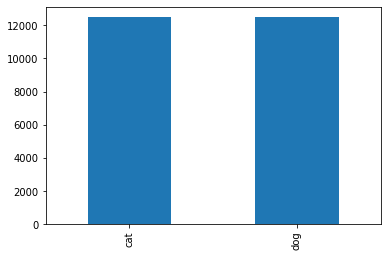

In [29]:
pd.Series(X_Title).value_counts().plot.bar()

## Callbacks

In [35]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

### Early Stopping - https://keras.io/api/callbacks/early_stopping/

<b> Basicaly it stops the Training when there's no improvement in the 'monitor' metric! </b> 

The Monitored Metric could be Accuracy or Loss, so if either isn't improving after certain number of <b> 'patience' </b> it'll stop the training as there's no use of further training the Model.

In [36]:
EarlyStop = EarlyStopping(patience=10)

### <b> Learning Rate - https://www.youtube.com/watch?v=jWT-AX9677k </b>

IN Deep Learning the basic idea is to <b> Improve the Accuracy </b> and <b> Reduce the Loss </b> through each Epoch. This is done by:

Multiplying the Learning rate with the Gradients and discard the previous Gradients.

We do this by (Prev_Gradients - New_Gradients) where: <br>
<b> Prev_Gradients = are the previously calculated Gradients using the Loss <br>
    New_Gradients = (Prev_Gradients * Learning_Rate) - (Prev_Gradients) </b>

So let's dive deeper,
Learning Rates can be of: 0.1, 0.01, 0.001, 0.0001.

When we have larger LR i.e. 0.1 the Gradients will skip faster and get poor results. <br>
When we have smaller LR i.e. 0.001 the Gradients will go over smooth covering most of them hence getting more accurate results!

In [37]:
print(1e-0)
print(1e-1)
print(1e-2)
print(1e-3)
print(1e-4)

1.0
0.1
0.01
0.001
0.0001


### <b> ReduceLROnPlateau - https://keras.io/api/callbacks/reduce_lr_on_plateau/ </b>

#### It reduces the Learning Rate when the Model Accuracy Stagnates

#### This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.

In [100]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            lr=1e-3,
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [39]:
callbacks = [EarlyStop, learning_rate_reduction]

### Data Augmentation

In [62]:
tf.config.experimental_run_functions_eagerly(True)

In [73]:
tf.__version__

'2.2.0'

In [74]:
np.__version__

'1.23.3'

In [75]:
!pip3 install numpy==1.19.5

  Using cached numpy-1.19.5-cp38-cp38-win_amd64.whl (13.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.3
    Uninstalling numpy-1.23.3:
      Successfully uninstalled numpy-1.23.3


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python38\\Lib\\site-packages\\~~mpy\\.libs\\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [60]:
from tensorflow.keras import preprocessing

data_augmentation_layer = Sequential([                                    
  layers.RandomFlip('horizontal',input_shape=(IMG_SIZE, IMG_SIZE, 3)),
  layers.RandomRotation(0.15),
  layers.RandomZoom(0.2),
  layers.RandomWidth(0.1),
  layers.RandomHeight(0.1),
], name='data_augmentation')

https://pyimagesearch.com/2021/06/28/data-augmentation-with-tf-data-and-tensorflow/

In [92]:
data_augmentation_layer = Sequential([                                    
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal',input_shape=(IMG_SIZE, IMG_SIZE, 3)),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.15),
  #tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
  tf.keras.layers.experimental.preprocessing.RandomWidth(0.1),
  tf.keras.layers.experimental.preprocessing.RandomHeight(0.1),
], name='data_augmentation')

NotImplementedError: Cannot convert a symbolic Tensor (rotation_matrix/strided_slice:0) to a numpy array.

In [97]:
trainAug = Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1.0 / 255),
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    #tf.keras.layers.experimental.preprocessing.RandomZoom(
      #  height_factor=(-0.05, -0.15),
      #  width_factor=(-0.05, -0.15)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.3)
])

In [50]:
tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=30, horizontal_flip=True)

### Convolutional Neural Networks

In [101]:
model = keras.Sequential([
trainAug,
    
keras.layers.Conv2D(filters=16,kernel_size = (3, 3),strides=1),
keras.layers.Activation(activation='relu'),
keras.layers.MaxPool2D(),
    
keras.layers.Conv2D(filters=32,kernel_size = (3, 3),strides=1),
keras.layers.Activation(activation='relu'),
keras.layers.MaxPool2D(),    
keras.layers.BatchNormalization(),
    
keras.layers.Conv2D(filters=64,kernel_size = (3, 3),strides=1),
keras.layers.Activation(activation='relu'),
keras.layers.MaxPool2D(),    
    
keras.layers.Conv2D(filters=128,kernel_size =(3, 3), strides=1),
keras.layers.Activation(activation='relu'),
keras.layers.MaxPool2D(),
  
keras.layers.Conv2D(filters=256,kernel_size =(3, 3), strides=1),
keras.layers.Activation(activation='relu'),
   
keras.layers.GlobalMaxPool2D(),   

keras.layers.Dense(256,activation='relu') ,

keras.layers.BatchNormalization(),
keras.layers.Dense(128,activation='relu') ,
    

keras.layers.Dense(64,activation='relu') ,
    
keras.layers.Dense(32,activation='relu') ,
keras.layers.Dense(16,activation='relu') ,
    
keras.layers.Dense(units=2,activation='softmax') ])
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.build()

print(model.summary())

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

### Train the model

In [99]:
EPOCHES = 10
BATCHES = 32

history = model.fit(X_Train, Y_Train, epochs=EPOCHES,batch_size=BATCHES,verbose=1,callbacks=callbacks, validation_data=(X_val, y_val))

Epoch 1/10
688/688 [==============================] - 47s 68ms/step - loss: 0.6283 - accuracy: 0.6499 - val_loss: 0.6352 - val_accuracy: 0.6657 - lr: 0.0010
Epoch 2/10
688/688 [==============================] - 45s 65ms/step - loss: 0.5519 - accuracy: 0.7232 - val_loss: 0.5783 - val_accuracy: 0.6930 - lr: 0.0010
Epoch 3/10
688/688 [==============================] - 46s 67ms/step - loss: 0.5131 - accuracy: 0.7564 - val_loss: 0.7325 - val_accuracy: 0.6670 - lr: 0.0010
Epoch 4/10
688/688 [==============================] - 48s 69ms/step - loss: 0.4728 - accuracy: 0.7814 - val_loss: 1.0422 - val_accuracy: 0.5567 - lr: 0.0010
Epoch 5/10
688/688 [==============================] - 47s 68ms/step - loss: 0.4468 - accuracy: 0.7961 - val_loss: 0.4566 - val_accuracy: 0.7820 - lr: 0.0010
Epoch 6/10
688/688 [==============================] - 46s 66ms/step - loss: 0.4143 - accuracy: 0.8172 - val_loss: 0.4543 - val_accuracy: 0.8127 - lr: 0.0010
Epoch 7/10
688/688 [==============================] - 48s 

### Save the model with wieghts

In [ ]:
model_json = model.to_json()
with open('/kaggle/working/model.json', 'w') as json_file:
    json_file.write(model_json)

In [106]:
model.save_weights('/kaggle/working/model_weights.h5')

OSError: Unable to create file (unable to open file: name = '/kaggle/working/model_weights.h5', errno = 2, error message = 'No such file or directory', flags = 13, o_flags = 302)

### check our model's history

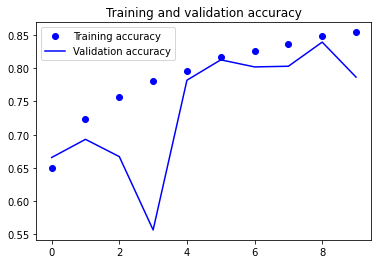

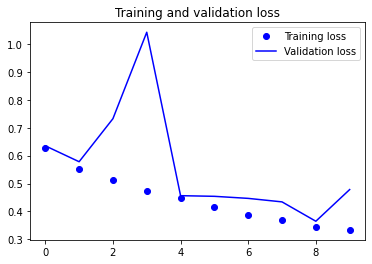

In [102]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Predict the test images

In [103]:
predicted_images = model.predict(X_test)

In [104]:
CATEGORIES = ['Cat', 'Dog']

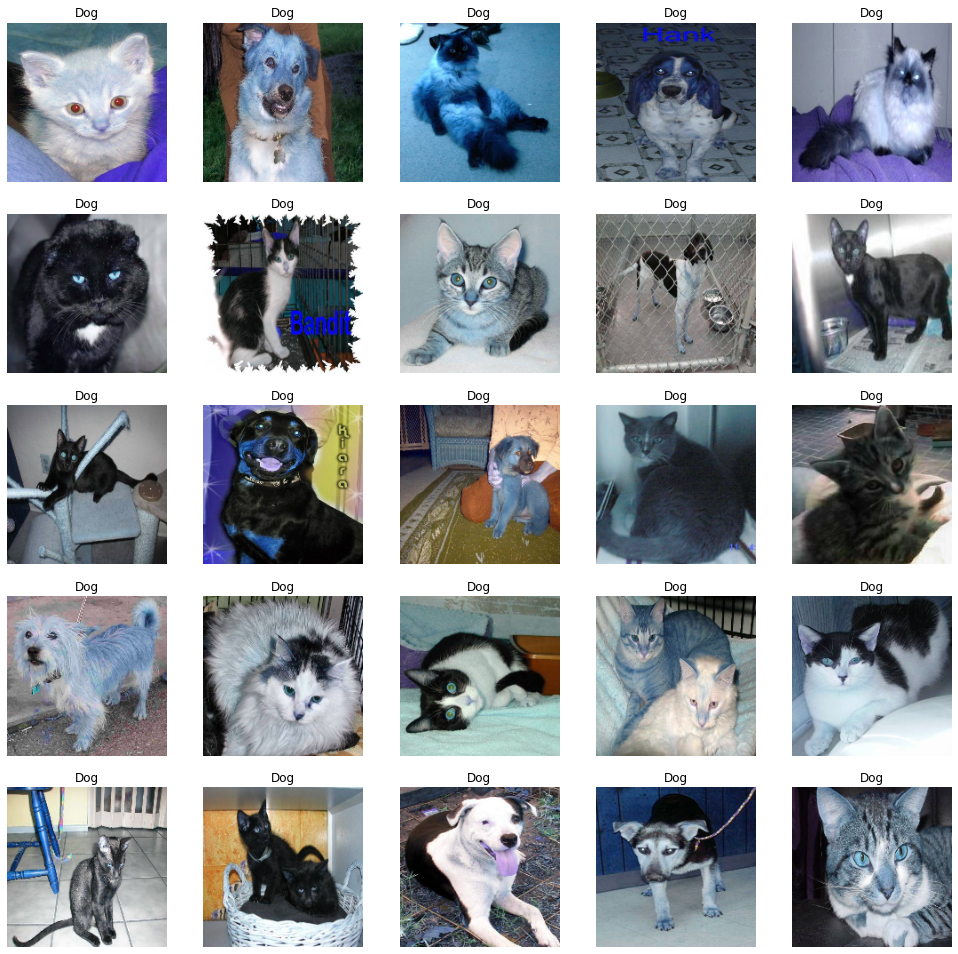

In [105]:
plt.figure(figsize=(17, 17))
for n, i in enumerate(list(np.random.randint(0, len(X_test), 25))):
    plt.subplot(5, 5, n+1)
    plt.imshow(array_to_img(X_test[i]))
    plt.axis('off')
    plt.title(CATEGORIES[np.argmax(predicted_images[i])])